# PRODIGY INFOTECH

**TASK-1**

**CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv("C:\\Users\\saisu\\OneDrive\\Documents\\mall_customers.csv")

**EDA**

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape


(200, 5)

In [9]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.duplicated().any()

False

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
df.rename(columns={"Genre":"Gender","Annual Income (k$)":"Income","Spending Score (1-100)":"Score"},inplace=True)

In [17]:
df

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
df.drop(columns=["CustomerID","Gender","Age"],inplace=True)

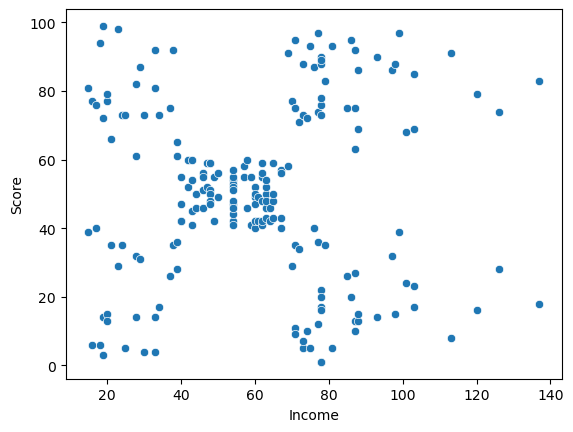

In [21]:
sns.scatterplot(x="Income",y="Score",data=df)
plt.show()

**DATA PREPROCESSING**

In [22]:
X = df

In [32]:
from sklearn.cluster import KMeans

In [33]:
wcss  = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    


In [34]:
print(wcss)

[269981.28, 186206.76002258612, 132162.13629759202, 73880.64496247195, 44448.45544793371, 38788.45862332112, 30566.451130251862, 25388.760028179368, 23451.621193758423, 20673.531111423832]


**Elbow Method**

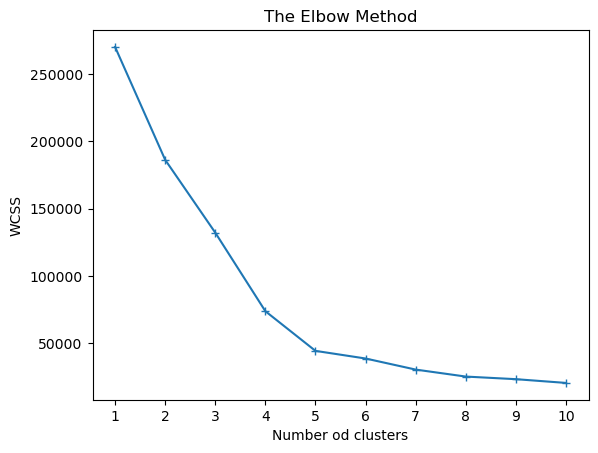

In [38]:
plt.plot(range(1, 11), wcss, marker = "+")
plt.xticks(range(1, 11))
plt.title("The Elbow Method")
plt.xlabel("Number od clusters")
plt.ylabel("WCSS")
plt.show()

**K-Mean clustering**

In [39]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state=True)

In [40]:
#fit and predict 
X["km_cluster"] = kmeans.fit_predict(X)

In [49]:
km_cluster = X["km_cluster"] 

**Analyze the Segments**

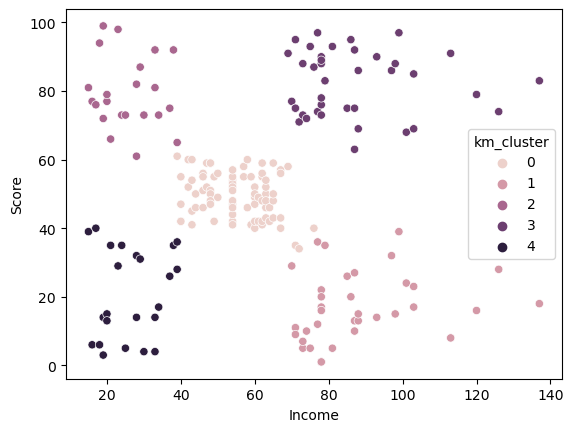

In [53]:
sns.scatterplot(x="Income", y="Score", hue="km_cluster", data=X)
plt.show()

**observation**

• **Cluster 0**: Average Income, Average Spending Score-Can target these set of customers by providing them with Low cost EM's etc.

• **Cluster 1**: High Income, Low Spending Score - Target these customers by asking the feedback and advertising the product in a better way

• **Cluster 2**: Low Income, High Spending Score - May or may not target these group of customers based on the policy of the mai

• **Cluster 3**: High Income, High Spending Score - **Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers**.

• **Cluster 4**: Low Income, Low Spending Score - Don't target these customers since they have less income and need to save money